In [207]:
import pandas as pd
import matplotlib.pyplot as plt


In [208]:
data = pd.read_csv('converter.csv')
data.head()


,EOVX,EOVY,EOVX1,EOVY1,IDOPONT,BCS_TÍPUSA
0,7328150308,2414490513,732815.0308,241449.0513,2019.01.11,Cselekmény típusa: tulajdon elleni szabálysértés
1,6543510000,2392120000,654351.0000,239212.0000,2018.11.22,Cselekmény típusa: tulajdon elleni szabálysértés
2,7385039416,2727022857,738503.9400,272702.2857,2019.01.30,Cselekmény típusa: tulajdon elleni szabálysértés
3,6523160000,2324820000,652316.0000,232482.0000,2018.12.16,Cselekmény típusa: tulajdon elleni szabálysértés
4,8815590000,2814900000,881559.0000,281490.0000,2018.12.01,Cselekmény típusa: tulajdon elleni szabálysértés


In [209]:
data.describe()


,EOVX,EOVY,EOVX1,EOVY1
count,6.499900e+04,6.499900e+04,64999.000000,64999.000000
mean,6.716668e+09,2.233939e+09,671666.758500,223393.908141
std,9.234985e+08,5.968177e+08,92349.848003,59681.766149
min,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,6.425863e+09,1.974597e+09,642586.280000,197459.695000
50%,6.539212e+09,2.385170e+09,653921.250000,238517.000000
75%,7.240477e+09,2.523278e+09,724047.710000,252327.815500
max,9.351040e+09,3.592820e+09,935104.000000,359282.000000


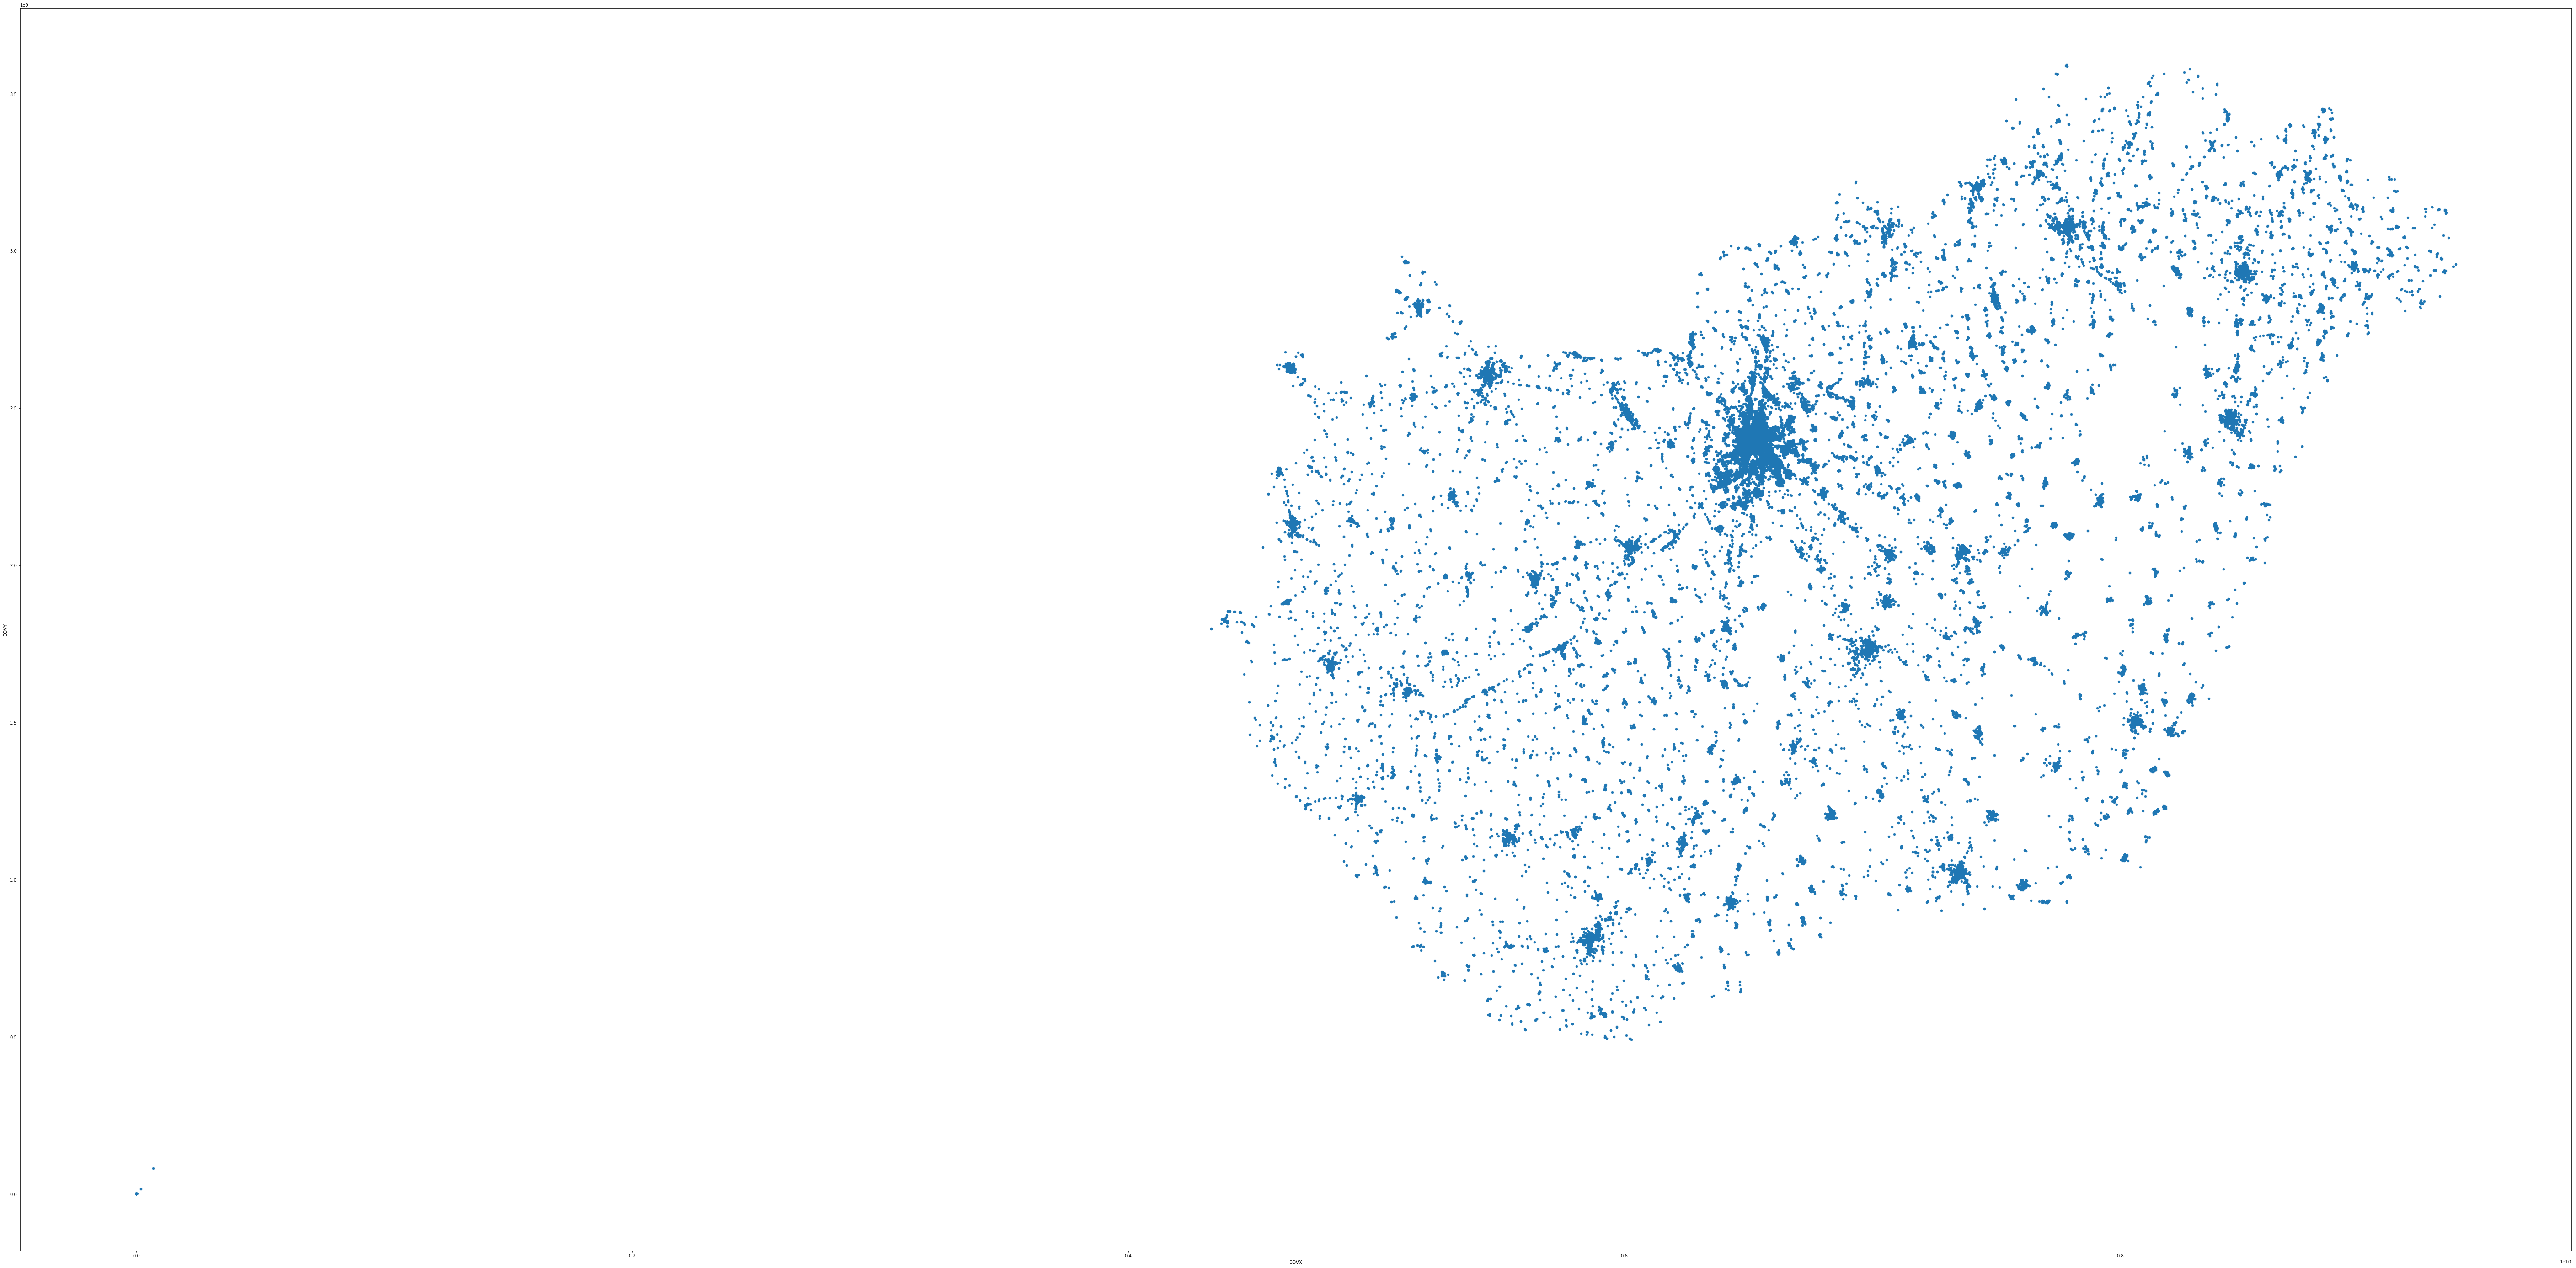

In [210]:
data.plot(kind="scatter", x="EOVX", y="EOVY", alpha=1, figsize=(100,50))
plt.savefig('fig1.png')
plt.show()


In [221]:
import pyproj
import numpy as np


In [211]:
# Define WGS84 projection 
wgs84 = pyproj.Proj("+init=EPSG:4326")
eov = pyproj.Proj("+init=EPSG:23700")


In [229]:
# Convert between systems
x = data['EOVX1'].values.tolist()
y = data['EOVY1'].values.tolist()
lat, lon = pyproj.transform(eov, wgs84, x, y)


In [232]:
pd_lat = pd.DataFrame(lat)
pd_lon = pd.DataFrame(lon)
type(pd_lat)


pandas.core.frame.DataFrame

In [234]:
data['lat'] = pd_lat
data['lon'] = pd_lon


In [235]:
# Save the transformed data in a new file
data.to_csv('data.csv')


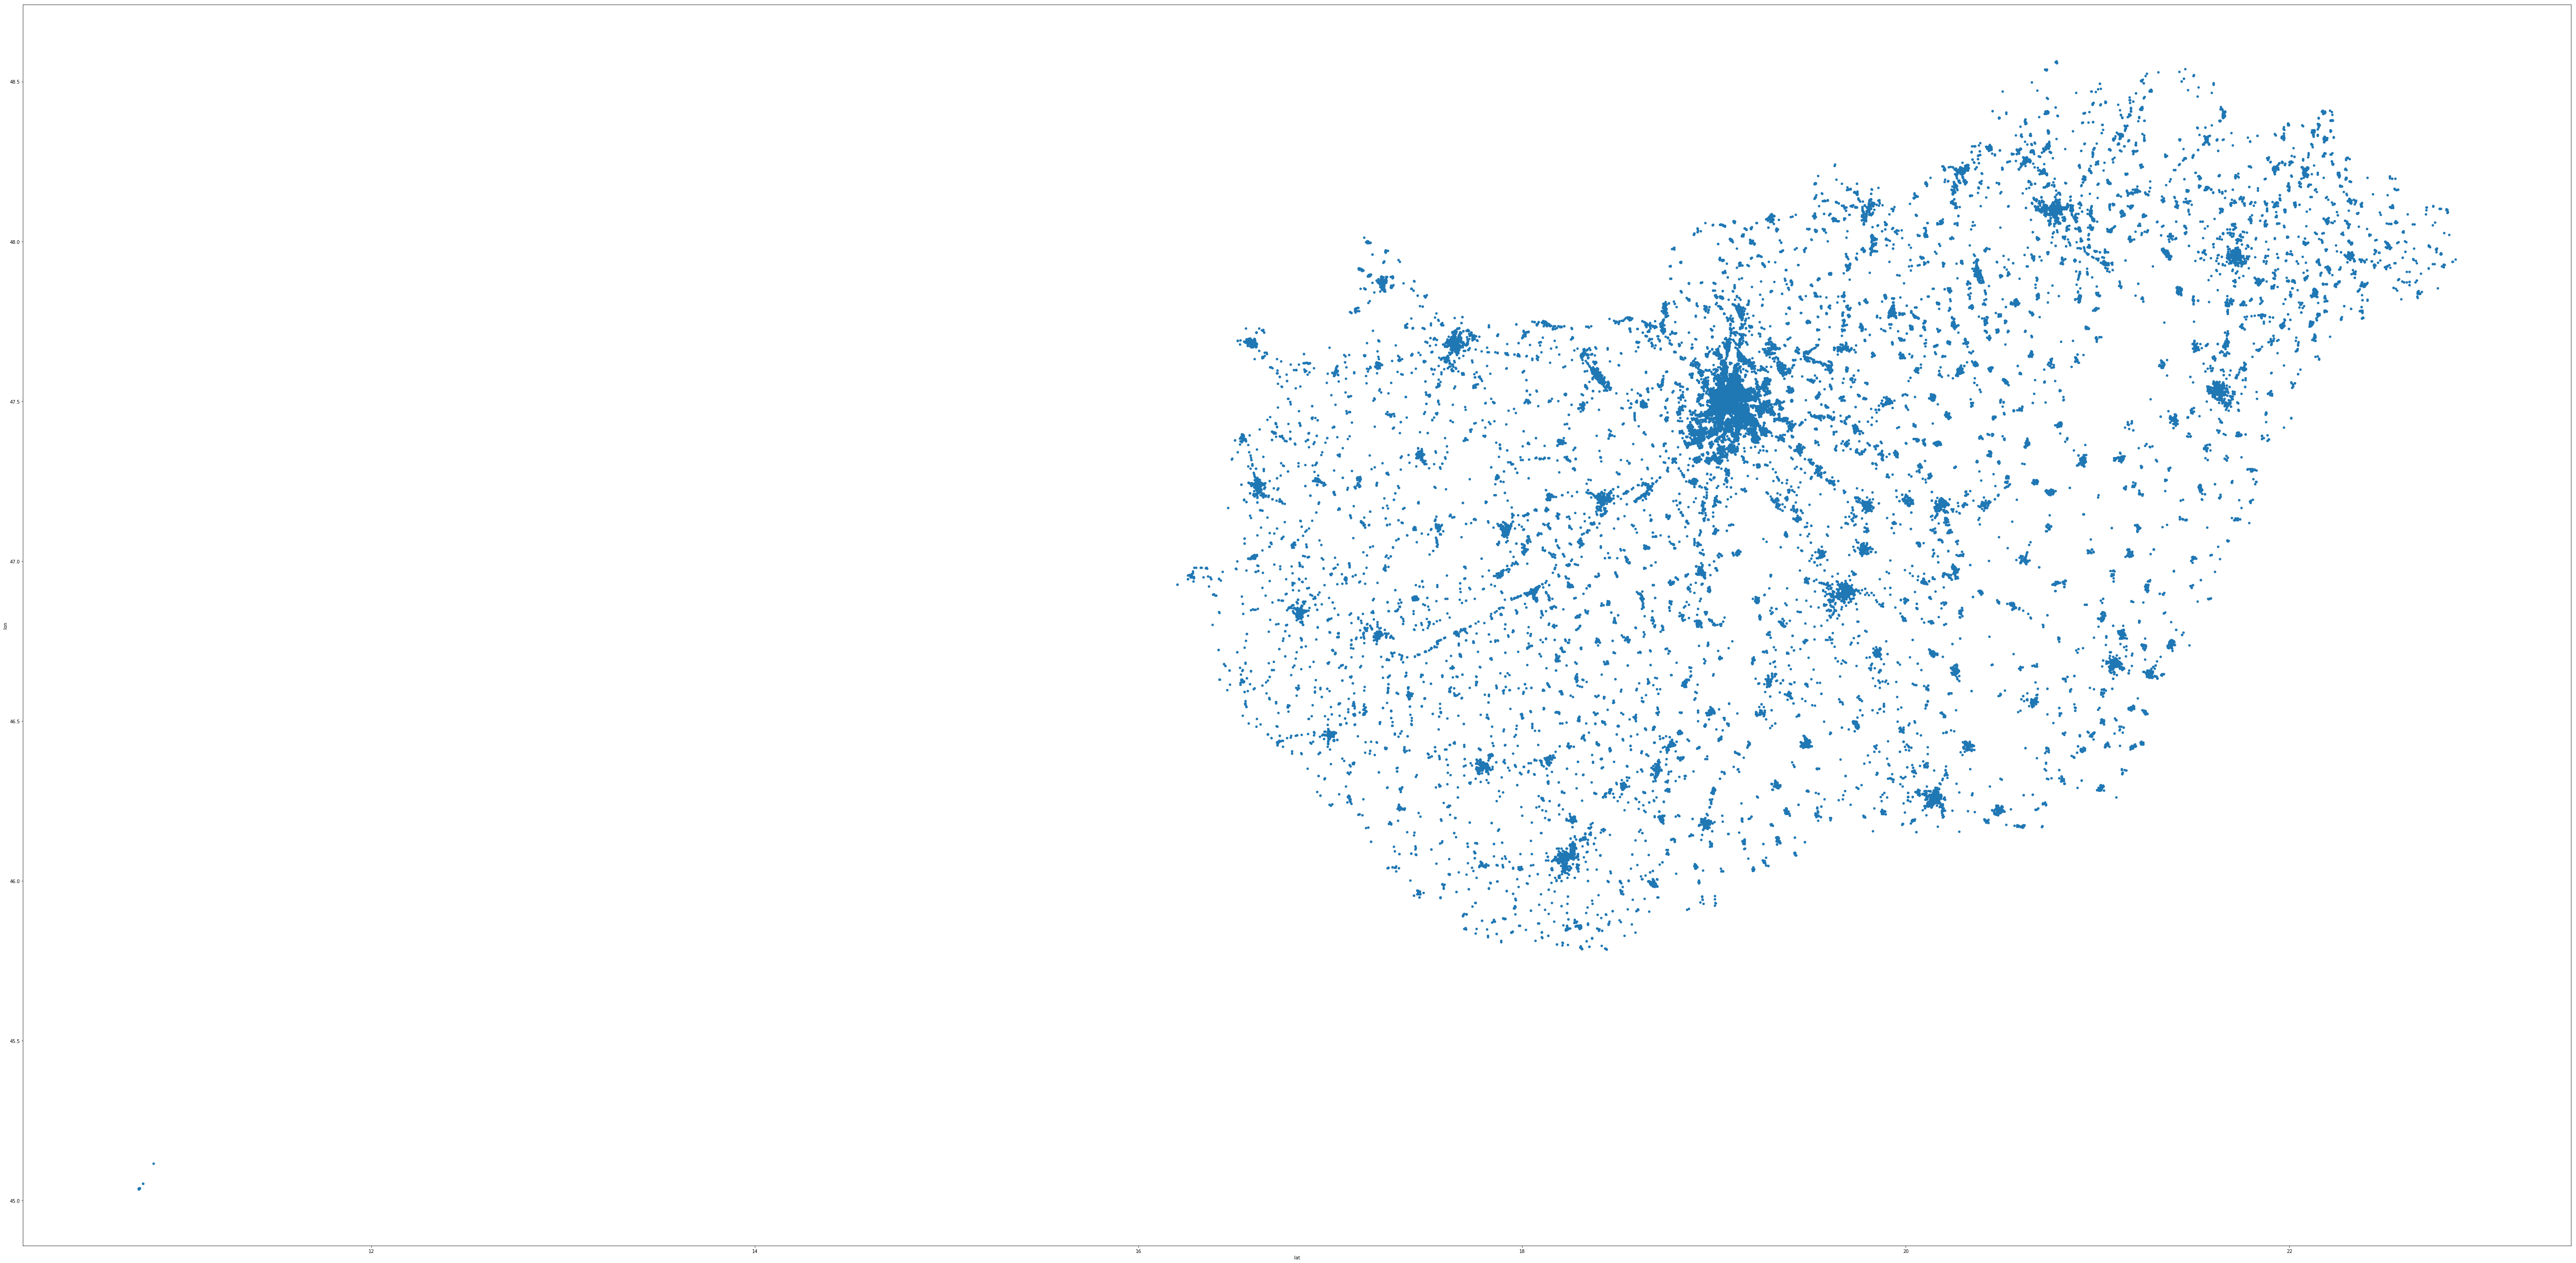

In [236]:
# Test the transformed coordinates
data.plot(kind = 'scatter', x = 'lat', y = 'lon', alpha = 1, figsize = (100, 50))
plt.savefig('fig2.png')
plt.show()
